# **Project Name -** **FedEx Logistics Performance Analysis**


##### **Project Type**    - EDA
##### **Contribution**    - Individual


#**Project Summary -**

This project focuses on a comprehensive Exploratory Data Analysis (EDA) of a FedEx Logistics dataset to understand and optimize the company's supply chain operations. The core business objective is to minimize delays, reduce freight costs, and improve overall delivery efficiency, ultimately enhancing customer satisfaction. The dataset contains detailed information about purchase orders, shipment methods, vendor agreements, delivery schedules, product details, and associated costs, providing a rich source for identifying areas of improvement.

The initial steps involved familiarizing with the dataset, including checking its dimensions, data types, and identifying missing or duplicate values. The dataset comprises 10324 rows and 33 columns. Initial inspection revealed 2383 missing values, accounting for approximately 0.70% of the total data, with no duplicate records found. Several columns, such as 'Dosage', 'Weight (Kilograms)', 'Freight Cost (USD)', and 'Line Item Insurance (USD)', were identified as having missing values, and some columns like 'Weight (Kilograms)' and 'Freight Cost (USD)' were noted to contain mixed data types, requiring cleaning.

A crucial part of the data wrangling process involved handling the date columns, which were converted to datetime objects to enable time-based calculations. A new column, 'Arrival', was created by calculating the difference between 'Delivered to Client Date' and 'Scheduled Delivery Date'. This allowed for the creation of an 'Arrival Status' column, categorizing deliveries as 'Early', 'On Time', or 'Delayed'. Missing values in 'Shipment Mode' and 'Line Item Insurance (USD)' were addressed by dropping the corresponding rows. The 'Weight (Kilograms)' and 'Freight Cost (USD)' columns were converted to numeric types, coercing errors to NaN.

The analysis then delved into key areas impacting logistics performance:

Delivery Time Analysis: This section explored factors affecting delivery times. The analysis of 'Arrival Status' by 'Shipment Mode' revealed that Air shipments had a notable percentage of delays, particularly to countries like Burundi and Togo. Truck shipments to Rwanda and Mozambique also showed significant delays. Comparing delivery times from 'PO Sent to Vendor Date' to 'Delivered to Client Date', it was found that deliveries to Pakistan, Guatemala, and Afghanistan had the longest average durations. Ocean and Air were identified as the shipment modes with the longest average delivery times. Analysis by 'Brand' highlighted that while many brands had 100% on-time deliveries, certain brands like SUN PHARMACEUTICAL INDUSTRIES LTD experienced a higher percentage of delays.

Cost vs Performance: The relationship between shipping costs and delivery time was examined. Shipment modes were categorized as high-cost (Ocean, Air) and low-cost (Truck, Rail, Air Charter). High-cost modes showed a higher percentage of early deliveries, while low-cost modes had a slightly higher percentage of on-time deliveries. The impact of 'Line Item Insurance (USD)' on delays was also analyzed, revealing that while there wasn't a clear trend, medium and high insurance categories had slightly higher delay percentages compared to low insurance.

Vendor and Product Group Analysis: This section investigated vendor lead times and delivery delays by vendor and product group. Vendor lead time, calculated from 'PQ First Sent to Client Date' to 'PO Sent to Vendor Date', showed variations across vendors, with some having significantly longer lead times than others. Analysis of 'Arrival Status' by 'Vendor' indicated that SUN PHARMACEUTICAL INDUSTRIES LTD and Abbott GmbH & Co. KG were among the vendors with the highest percentages of delayed deliveries. Looking at 'Product Group' delays, ARV and HRDT were identified as product groups with exclusively delayed deliveries, with ARV having the highest number of delayed shipments.

Product and Weight Analysis: The relationship between 'Weight (Kilograms)' and delivery time was explored, surprisingly finding that lighter weight orders tended to take longer for delivery compared to heavier ones. The impact of 'Line Item Quantity' on 'Freight Cost (USD)' was also studied, confirming that very large quantity products incurred the highest freight costs, while small quantity products had the lowest.

Customer Satisfaction Indicators: The on-time and early delivery rates were calculated, providing a quantitative measure of delivery performance. The effectiveness of repeat vendors was studied by comparing the 'Arrival Status' distribution of their initial and recent orders. This analysis revealed that some vendors, like Aurobindo Pharma Limited and CIPLA LIMITED, showed improvement in on-time deliveries over time, while others, such as HETERO LABS LIMITED and SCMS from RDC, exhibited declining performance.

Seasonality Trends: The analysis of delivery trends by month showed that August had the fastest average delivery times and a relatively low delay rate, while February experienced the longest delivery times and the highest delay rate. May and February also had high delay percentages. Studying cost fluctuations by month revealed that February, September, and October had the highest average freight costs, possibly indicating peak demand, while April and June had the lowest costs.

Overall, the EDA provided valuable insights into the factors contributing to delays and cost variations in FedEx Logistics' operations. The analysis highlighted specific countries, shipment modes, vendors, and product groups that require attention to optimize the supply chain. The seasonality analysis offered insights into peak periods for delays and higher costs, enabling strategic planning. The findings from this analysis can be used to develop targeted strategies to improve delivery efficiency, reduce costs, and ultimately enhance customer satisfaction. The visualizations, including bar charts and a stacked bar chart, effectively communicated the key insights from the data.

# **GitHub Link -**

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

Logistics optimization is critical for maintaining a competitive edge in the global supply chain industry, especially for companies like FedEx Logistics. With the rapid rise of eCommerce and an increasingly complex global distribution network, ensuring efficient shipment management is more vital than ever. Delays, high freight costs, and inefficiencies in the supply chain can significantly impact customer satisfaction and operational profitability.

FedEx Logistics operates in a dynamic environment, managing a variety of purchase orders (POs), shipment methods, vendor agreements (INCO terms), and delivery schedules while catering to diverse industries and regions. Identifying bottlenecks, understanding patterns in delays, and optimizing shipment processes are key to reducing costs and improving delivery timelines.

This project aims to analyze a comprehensive dataset capturing FedEx’s logistics operations, including shipment details, product descriptions, and dosage forms. By conducting exploratory data analysis. the project seeks to identify inefficiencies, forecast potential delays, and recommend strategies to streamline supply chain operations. The ultimate goal is to enhance cost-effectiveness and ensure timely deliveries, improving both operational efficiency and customer satisfaction.

#### **Define Your Business Objective?**


***Optimize FedEx Logistics' supply chain operations by minimizing delays, reducing freight costs, and enhancing delivery efficiency to improve customer satisfaction.***

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


5. You have to create at least 20 logical & meaningful charts having important insights.

[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
data = pd.read_csv('/content/SCMS_Delivery_History_Dataset.csv')

### Dataset First View

In [ ]:
data.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


### Dataset Rows & Columns count

In [ ]:
data.shape

(10324, 33)

### Dataset Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(data.isnull().sum())

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [ ]:
# Percentage of Null Values
for i in data.columns:
  print(f'{i} : {(data[i].isna().sum()/data.shape[0])*100}')

ID : 0.0
Project Code : 0.0
PQ # : 0.0
PO / SO # : 0.0
ASN/DN # : 0.0
Country : 0.0
Managed By : 0.0
Fulfill Via : 0.0
Vendor INCO Term : 0.0
Shipment Mode : 3.487020534676482
PQ First Sent to Client Date : 0.0
PO Sent to Vendor Date : 0.0
Scheduled Delivery Date : 0.0
Delivered to Client Date : 0.0
Delivery Recorded Date : 0.0
Product Group : 0.0
Sub Classification : 0.0
Vendor : 0.0
Item Description : 0.0
Molecule/Test Type : 0.0
Brand : 0.0
Dosage : 16.815187911662147
Dosage Form : 0.0
Unit of Measure (Per Pack) : 0.0
Line Item Quantity : 0.0
Line Item Value : 0.0
Pack Price : 0.0
Unit Price : 0.0
Manufacturing Site : 0.0
First Line Designation : 0.0
Weight (Kilograms) : 0.0
Freight Cost (USD) : 0.0
Line Item Insurance (USD) : 2.7799302595893067


<Axes: >

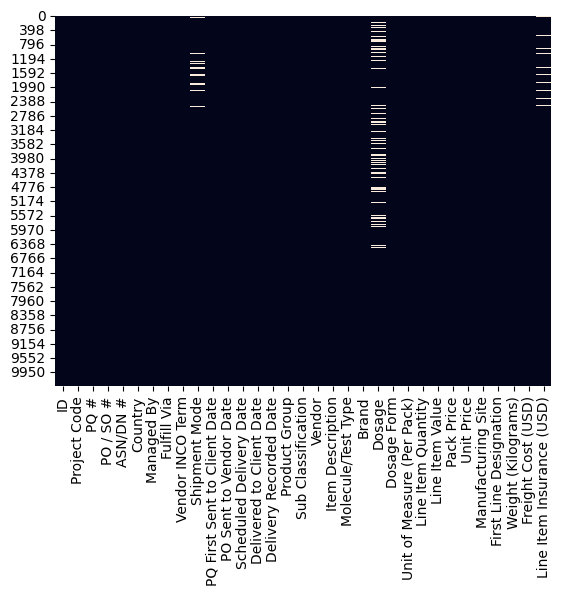

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(data.isnull(), cbar=False)

In [ ]:
total_null_values = data.isnull().sum().sum()  # Total number of null values
total_cells = data.size  # Total number of cells (rows × columns)

# Calculate percentage
null_percentage = (total_null_values / total_cells) * 100

print(f"Total Null Value Percentage: {null_percentage:.2f}%")
print(f"Total Null Values: {total_null_values}")


Total Null Value Percentage: 0.70%
Total Null Values: 2383


### What did you know about your dataset?

The dataset provided is from the logistics industry, specifically focused on FedEx Logistics' operations. The primary objective is to analyze the shipment management processes, identify bottlenecks or delays, and optimize the supply chain for cost-effectiveness and efficiency.

The dataset captures details such as purchase orders (POs), shipment methods, vendor agreements (INCO terms), delivery schedules, and product-specific details like item descriptions and dosage forms. These features are critical for understanding the end-to-end logistics operations and making data-driven decisions.

The dataset consists of 10324 rows and 33 columns. Initial inspection reveals there are 2383 missing values means 0.70% missing values, no duplicate records.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe(include='all')

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
count,10324.000000,10324,10324,10324,10324,10324,10324,10324,10324,9964,...,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10324,10324,10324,10324,10037.000000
unique,NaN,142,1237,6233,7030,43,4,2,8,4,...,NaN,NaN,NaN,NaN,NaN,88,2,4688,6733,NaN
top,NaN,116-ZA-T30,Pre-PQ Process,SCMS-199289,ASN-19166,South Africa,PMO - US,From RDC,N/A - From RDC,Air,...,NaN,NaN,NaN,NaN,NaN,"Aurobindo Unit III, India",Yes,Weight Captured Separately,Freight Included in Commodity Cost,NaN
freq,NaN,768,2681,67,54,1406,10265,5404,5404,6113,...,NaN,NaN,NaN,NaN,NaN,3172,7030,1507,1442,NaN
mean,51098.968229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,NaN,NaN,NaN,NaN,240.117626
std,31944.332496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,NaN,NaN,NaN,NaN,500.190568
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,12795.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,408.000000,4.314593e+03,4.120000,0.080000,NaN,NaN,NaN,NaN,6.510000
50%,57540.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,NaN,NaN,NaN,NaN,47.040000
75%,83648.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,NaN,NaN,NaN,NaN,252.400000


### Variables Description


*   ID: Unique identifier for each record (categorical, numeric format).
* Project Code: Code representing the project associated with the order (categorical).
* PQ #: Pre-qualification number assigned during the procurement process (categorical).
* PO / SO #: Purchase Order or Sales Order number (categorical).
* ASN/DN #: Advanced Shipment Notice or Delivery Note number (categorical).
* Country: Country where the shipment is being delivered (categorical).
* Managed By: Internal team managing the shipment (categorical).
* Fulfill Via: Method of fulfillment, e.g., Direct Drop (categorical).
* Vendor INCO Term: International Commercial Terms agreed upon with the vendor (categorical).
* Shipment Mode: Mode of shipment, e.g., Air, Sea, or Road (categorical).
* PQ First Sent to Client Date: Date when the Pre-qualification was first sent to the client (datetime format, object in the dataset).
* PO Sent to Vendor Date: Date when the Purchase Order was sent to the vendor (datetime format, object in the dataset).
* Scheduled Delivery Date: Planned delivery date for the shipment (datetime format, object in the dataset).
* Delivered to Client Date: Actual date when the shipment was delivered to the client (datetime format, object in the dataset).
* Delivery Recorded Date: Date when the delivery was recorded in the system (datetime format, object in the dataset).
* Product Group: Broad category of the products in the shipment (categorical).
* Sub Classification: Detailed classification of the products (categorical).
* Vendor: Vendor or supplier responsible for the shipment (categorical).
* Item Description: Description of the items in the shipment (categorical).
* Molecule/Test Type: Type of molecule or test associated with the shipment (categorical).
* Brand: Brand name of the product (categorical).
* Dosage: Dosage amount of the product (categorical, missing values present).
* Dosage Form: Form in which the product is dosed, e.g., tablet, capsule (categorical).
* Unit of Measure (Per Pack): Quantity of the product per pack (numeric).
* Line Item Quantity: Number of line items in the shipment (numeric).
* Line Item Value: Total value of the line items in the shipment (numeric).
* Pack Price: Price of each pack in the shipment (numeric).
* Unit Price: Price per unit of the product (numeric).
* Manufacturing Site: Location of the product's manufacturing site (categorical).
* First Line Designation: Indicates whether the product is a first-line treatment ("Yes" or "No") (categorical).
* Weight (Kilograms): Weight of the shipment in kilograms (object, contains mixed types).
* Freight Cost (USD): Cost of shipping the freight in USD (object, contains mixed types).
* Line Item Insurance (USD): Insurance cost for the line items in USD (numeric, some missing values).



In [ ]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("No. of unique values in ",i,"is",data[i].nunique(),".")

No. of unique values in  ID is 10324 .
No. of unique values in  Project Code is 142 .
No. of unique values in  PQ # is 1237 .
No. of unique values in  PO / SO # is 6233 .
No. of unique values in  ASN/DN # is 7030 .
No. of unique values in  Country is 43 .
No. of unique values in  Managed By is 4 .
No. of unique values in  Fulfill Via is 2 .
No. of unique values in  Vendor INCO Term is 8 .
No. of unique values in  Shipment Mode is 4 .
No. of unique values in  PQ First Sent to Client Date is 765 .
No. of unique values in  PO Sent to Vendor Date is 897 .
No. of unique values in  Scheduled Delivery Date is 2006 .
No. of unique values in  Delivered to Client Date is 2093 .
No. of unique values in  Delivery Recorded Date is 2042 .
No. of unique values in  Product Group is 5 .
No. of unique values in  Sub Classification is 6 .
No. of unique values in  Vendor is 73 .
No. of unique values in  Item Description is 184 .
No. of unique values in  Molecule/Test Type is 86 .
No. of unique values in  

## 3. ***Data Wrangling***

## **Brainstorming Points for FedEx Logistics Performance Analysis**


1. Delivery Time Analysis

Factors Affecting Delivery Time: Analyze the impact of Shipment Mode, Country, Vendor, and Product Group on delivery times.

Distribution of Delivery Times: Study the time taken from PO Sent to Vendor Date to Delivered to Client Date to identify typical delivery time ranges.

Delivery Time vs Customer Location: Calculate the average delivery time for different Countries and analyze regional patterns.

Brand wise Delivery Performance: Which Brand products are delivered Early , On time and delayed

2. Cost vs Performance

Shipping Cost vs Delivery Time: Compare high-cost vs low-cost shipment modes and their respective delivery times.

Insurance vs Delivery Time: Analyze whether higher insurance costs reduce delays.

3. Vendor and Product Group

Vendor Lead Times: Analyze the time taken from PO Sent to Vendor Date to PQ First Sent to Client Date for each vendor.

Delivery Delays by Vendor: Compare vendor-wise performance for on-time vs delayed deliveries.

Delivery Delays in Product Group: Comparing which product group is mostly delayed

Product Group Delays: Analyze specific product categories (e.g., dosage forms, molecule types) for frequent delays.

4. Product and Weight Analysis

Weight vs Delivery Time: Investigate whether heavier shipments have longer delivery times.

Quantity vs Freight Cost: Study how Line Item Quantity impacts shipping costs.


5. Customer Satisfaction Indicators

On-Time Delivery Rate: Calculate the percentage of shipments delivered on or before the Scheduled Delivery Date.

Repeat Vendor Effectiveness: Study whether vendors with repeat orders show improved performance.



6. Seasonality Trends

Delivery Trends by Month: Analyze delivery times and delays across months to identify seasonal spikes.

Cost Fluctuations: Study how shipping costs vary during peak seasons or specific months.



# Data Cleaning

In [ ]:
# replacing null to np.nan
data.replace({"null": np.nan},inplace= True)

In [ ]:
# droping rows of lower null values

data = data.dropna(subset=['Shipment Mode', 'Line Item Insurance (USD)'], how='any')

In [ ]:
data.shape

(9783, 33)

In [ ]:
# Percentage of Null Values
for i in data.columns:
  print(f'{i} : {(data[i].isna().sum()/data.shape[0])*100}')

ID : 0.0
Project Code : 0.0
PQ # : 0.0
PO / SO # : 0.0
ASN/DN # : 0.0
Country : 0.0
Managed By : 0.0
Fulfill Via : 0.0
Vendor INCO Term : 0.0
Shipment Mode : 0.0
PQ First Sent to Client Date : 0.0
PO Sent to Vendor Date : 0.0
Scheduled Delivery Date : 0.0
Delivered to Client Date : 0.0
Delivery Recorded Date : 0.0
Product Group : 0.0
Sub Classification : 0.0
Vendor : 0.0
Item Description : 0.0
Molecule/Test Type : 0.0
Brand : 0.0
Dosage : 16.61044669324338
Dosage Form : 0.0
Unit of Measure (Per Pack) : 0.0
Line Item Quantity : 0.0
Line Item Value : 0.0
Pack Price : 0.0
Unit Price : 0.0
Manufacturing Site : 0.0
First Line Designation : 0.0
Weight (Kilograms) : 0.0
Freight Cost (USD) : 0.0
Line Item Insurance (USD) : 0.0


# 1. Analysis - Delivery Time
1. Factors Affecting Delivery Time: Analyze the impact of Shipment Mode, Country, Vendor, and Product Group on delivery times.

2. Delivery Time vs Customer Location: Calculate the average delivery time for different Countries and analyze regional patterns.

In [ ]:
# Convert 'Delivery Recorded Date' to datetime objects
data['Delivery Recorded Date'] = pd.to_datetime(data['Delivery Recorded Date'], errors='coerce')

data['Scheduled Delivery Date'] = pd.to_datetime(data['Scheduled Delivery Date'], errors='coerce')

data['Delivered to Client Date'] = pd.to_datetime(data['Delivered to Client Date'], errors='coerce')

data['PQ First Sent to Client Date'] = pd.to_datetime(data['PQ First Sent to Client Date'], errors='coerce')

data['PO Sent to Vendor Date'] = pd.to_datetime(data['PO Sent to Vendor Date'], errors='coerce')


In [ ]:
# creating column named Arrival, by calculating the delivery is delayed or early
data.loc[:, 'Arrival'] = data.loc[:, 'Delivered to Client Date'] - data.loc[:, 'Scheduled Delivery Date']

In [ ]:
# function to check delivery is late or early.
# Define the arrival status based on the difference
def get_status(arrival):
        if pd.isna(arrival):
            return 'Unknown'  # Handle missing values
        elif arrival.days < 0:
            return 'Early'
        elif arrival.days > 0:
            return 'Delayed'
        else:
            return 'On Time'

In [ ]:
# Apply the status logic
data.loc[:,'Arrival Status'] = data.loc[:,'Arrival'].apply(get_status)

In [ ]:
data.head(5)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Arrival,Arrival Status
19,92,102-NG-T01,Pre-PQ Process,SCMS-592,ASN-485,Nigeria,PMO - US,Direct Drop,EXW,Air,...,80000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,341,2682.47,128.00,0 days,On Time
21,108,104-CI-T01,Pre-PQ Process,SCMS-698,ASN-727,Côte d'Ivoire,PMO - US,Direct Drop,CIP,Air,...,140581.5,25.50,0.42,"BMS Meymac, France",Yes,2126,Freight Included in Commodity Cost,224.93,0 days,On Time
22,115,108-VN-T01,Pre-PQ Process,SCMS-753,ASN-781,Vietnam,PMO - US,Direct Drop,EXW,Air,...,1920.0,1.92,0.01,"Aurobindo Unit III, India",Yes,941,4193.49,3.07,0 days,On Time
23,116,108-VN-T01,Pre-PQ Process,SCMS-759,ASN-632,Vietnam,PMO - US,Direct Drop,FCA,Air,...,41095.0,82.19,0.68,ABBVIE Ludwigshafen Germany,Yes,117,1767.38,65.75,0 days,On Time
24,130,100-HT-T01,Pre-PQ Process,SCMS-10080,ASN-628,Haiti,PMO - US,Direct Drop,EXW,Air,...,53992.5,71.99,0.72,Inverness Japan,Yes,171,3518.38,86.39,8 days,Delayed


In [ ]:
# saving the edited dataset

# Creating a copy of the edited dataset
#modified_data = data.copy()

In [ ]:
# modified_data.to_csv('edited_dataset.csv', index=False)

In [ ]:
# Factors Affecting Delivery Time: Analyze the impact of Shipment Mode, Country, Vendor, and Product Group on delivery times.

# Calculate the percentage of each arrival status within each shipment mode
arrival_status_by_shipment = data.groupby(['Shipment Mode'])['Arrival Status'].value_counts(normalize=True).unstack()

In [ ]:
arrival_status_by_shipment

Arrival Status,Delayed,Early,On Time
Shipment Mode,,,
Air,0.098449,0.199258,0.702293
Air Charter,0.115385,0.695385,0.189231
Ocean,0.175202,0.040431,0.784367
Truck,0.160777,0.401767,0.437456


In [ ]:
top_delayed_shipment = arrival_status_by_shipment['Delayed'].sort_values(ascending=False).head(5)

# Print the result
print(top_delayed_shipment)

Shipment Mode
Ocean          0.175202
Truck          0.160777
Air Charter    0.115385
Air            0.098449
Name: Delayed, dtype: float64


In [ ]:
arrival_status_by_country = data.groupby(['Country','Shipment Mode'])['Arrival Status'].value_counts(normalize=True).unstack()
arrival_status_by_country

Arrival Status              Delayed     Early   On Time
Country     Shipment Mode                              
Afghanistan Air                 NaN       NaN  1.000000
Angola      Air                 NaN       NaN  1.000000
            Truck               NaN       NaN  1.000000
Belize      Air                 NaN  1.000000       NaN
Benin       Air            0.230769  0.538462  0.230769
...                             ...       ...       ...
Zambia      Truck          0.230570  0.463731  0.305699
Zimbabwe    Air            0.049645  0.120567  0.829787
            Air Charter         NaN  0.055556  0.944444
            Ocean               NaN       NaN  1.000000
            Truck          0.194444  0.580556  0.225000

[85 rows x 3 columns]

In [ ]:
9# Filter rows where 'On Time' is 1.0 and get the country names
on_time_countries = arrival_status_by_country[arrival_status_by_country['On Time'] == 1.0].index

# Print the result
print(on_time_countries)

MultiIndex([(       'Afghanistan',   'Air'),
            (            'Angola',   'Air'),
            (            'Angola', 'Truck'),
            (          'Botswana', 'Truck'),
            (      'Burkina Faso',   'Air'),
            (        'Congo, DRC', 'Truck'),
            (     'Côte d'Ivoire', 'Ocean'),
            ('Dominican Republic', 'Truck'),
            (          'Ethiopia', 'Ocean'),
            (          'Ethiopia', 'Truck'),
            (             'Ghana', 'Ocean'),
            (            'Guinea',   'Air'),
            (             'Haiti', 'Ocean'),
            (        'Kazakhstan',   'Air'),
            (        'Kyrgyzstan',   'Air'),
            (           'Lebanon',   'Air'),
            (           'Lesotho',   'Air'),
            (           'Liberia',   'Air'),
            (            'Malawi',   'Air'),
            (            'Malawi', 'Ocean'),
            (              'Mali',   'Air'),
            (        'Mozambique', 'Ocean'),
          

In [ ]:
# Sum the values in each status column
total_counts = arrival_status_by_country[['Delayed', 'Early', 'On Time']].sum()

# Calculate the percentage for each status
total_percentages = (total_counts / total_counts.sum()) * 100

# Print the result
print(total_percentages)

Arrival Status
Delayed     7.354430
Early      23.832605
On Time    68.812964
dtype: float64


In [ ]:
top_delayed_countries = arrival_status_by_country['Delayed'].sort_values(ascending=False).head(5)

# Print the result
print(top_delayed_countries)

Country     Shipment Mode
Burundi     Air              0.387755
Rwanda      Truck            0.338028
Togo        Air              0.333333
Senegal     Air              0.333333
Mozambique  Truck            0.317507
Name: Delayed, dtype: float64


In [ ]:
arrival_status_by_vendor = data.groupby(['Vendor'])['Arrival Status'].value_counts(normalize=True).unstack()
arrival_status_by_vendor

Arrival Status,Delayed,Early,On Time
Vendor,,,
ABBOTT LABORATORIES (PUERTO RICO),NaN,NaN,1.000000
ABBOTT LOGISTICS B.V.,NaN,NaN,1.000000
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),0.011696,0.005848,0.982456
"ABBVIE, SRL (FORMALLY ABBOTT LABORATORIES INTERNATIONAL CO.)",NaN,NaN,1.000000
"ACCESS BIO, INC.",NaN,NaN,1.000000
...,...,...,...
THE MEDICAL EXPORT GROUP BV,NaN,NaN,1.000000
TURE PHARMACEUTICALS & MEDICAL SUPPLIES P.L.C.,NaN,NaN,1.000000
"Trinity Biotech, Plc",NaN,0.005780,0.994220


In [ ]:
top_delayed_vendors = arrival_status_by_vendor['Delayed'].sort_values(ascending=False).head(5)

# Print the result
print(top_delayed_vendors)

Vendor
SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LABORATORIES LIMITED)    0.250000
Abbott GmbH & Co. KG                                                0.200000
SCMS from RDC                                                       0.183771
Aurobindo Pharma Limited                                            0.145997
CIPLA LIMITED                                                       0.136905
Name: Delayed, dtype: float64


In [ ]:
on_time_vendors = arrival_status_by_vendor[arrival_status_by_vendor['On Time'] == 1.0].index

# Print the result
print(on_time_vendors)

Index(['ABBOTT LABORATORIES (PUERTO RICO)', 'ABBOTT LOGISTICS B.V.',
       'ABBVIE, SRL (FORMALLY ABBOTT LABORATORIES INTERNATIONAL CO.)',
       'ACCESS BIO, INC.', 'ACOUNS NIGERIA LTD', 'ACTION MEDEOR E.V.',
       'AHN (PTY) LTD (AKA UCB (S.A.)', 'AMSTELFARMA B.V.',
       'AUROBINDO PHARAM (SOUTH AFRICA)', 'B&C GROUP S.A.',
       'BIO-RAD LABORATORIES PTY LTD. (SOUTH AFRICA)',
       'BIOLYTICAL LABORATORIES INC.', 'BRISTOL-MYERS SQUIBB',
       'BUNDI INTERNATIONAL DIAGNOSTICS LTD', 'ETHNOR DEL ISTMO S.A.',
       'EY Laboratories', 'GILEAD SCIENCES IRELAND, INC.',
       'GLAXOSMITHKLINE EXPORT LIMITED', 'HUMAN GMBH',
       'Hoffmann-La Roche ltd Basel', 'IDIS LIMITED', 'IMRES B.V.',
       'INTERNATIONAL HEALTHCARE DISTRIBUTORS',
       'INVERNESS MEDICAL INNOVATIONS HONG KONG LTD',
       'INVERNESS MEDICAL INNOVATIONS SOUTH AFRICA (PTY) LTD',
       'JANSSEN SCIENCES IRELAND UC (FORMERLY JANSSEN R&D IRELAND)',
       'KAS MEDICS LIMITED',
       'LAWRENCE LABORATORIES (SUBS

In [ ]:
arrival_status_by_pg= data.groupby(['Product Group'])['Arrival Status'].value_counts(normalize=True).unstack()
arrival_status_by_pg

Arrival Status,Delayed,Early,On Time
Product Group,,,
ACT,NaN,0.062500,0.937500
ANTM,NaN,0.045455,0.954545
ARV,0.131527,0.330296,0.538177
HRDT,0.068603,0.063041,0.868356
MRDT,NaN,NaN,1.000000


In [ ]:
on_time_pg = arrival_status_by_pg[arrival_status_by_pg['On Time'] == 1.0].index

# Print the result
print(on_time_pg)

Index(['MRDT'], dtype='object', name='Product Group')


In [ ]:
top_delayed_pg = arrival_status_by_pg['Delayed'].sort_values(ascending=False).head(2)

# Print the result
print(top_delayed_pg)

Product Group
ARV     0.131527
HRDT    0.068603
Name: Delayed, dtype: float64


Distribution of Delivery Times: Study the time taken from **PO Sent to Vendor Date** to **Delivered to Client Date** to identify typical delivery time ranges.

In [ ]:
# Distribution of Delivery Times: Study the time taken from PO Sent to Vendor Date to Delivered to Client Date to identify typical delivery time ranges.

data.loc[:,"time_taken_to_deliver"] = data.loc[:,'Delivered to Client Date'] - data.loc[:,'PO Sent to Vendor Date']

In [ ]:
# Top 3 country where most time(average) taken to deliver after client notified

most_time_country= data.groupby(['Country'])['time_taken_to_deliver'].mean().sort_values(ascending=False).head(3)
most_time_country

,time_taken_to_deliver
Country,
Pakistan,292 days 14:24:00
Guatemala,214 days 18:00:00
Afghanistan,164 days 08:00:00


In [ ]:
# top 3 shipment mode where most time taken to deiver after client notifed

most_time_shipment = data.groupby(['Shipment Mode'])['time_taken_to_deliver'].mean().sort_values(ascending=False).head(3)
most_time_shipment

,time_taken_to_deliver
Shipment Mode,
Ocean,176 days 20:51:08.852459016
Air,111 days 07:10:23.971162512
Air Charter,80 days 22:40:00


In [ ]:
# top 3 vendor where most time taken to deliver after the client notified

most_time_vendor = data.groupby(['Vendor'])['time_taken_to_deliver'].mean().sort_values(ascending=False).head(3)
most_time_vendor

,time_taken_to_deliver
Vendor,
INVERNESS MEDICAL INNOVATIONS HONG KONG LTD,521 days 12:00:00
IDIS LIMITED,275 days 08:00:00
EMCURE PHARMACEUTICALS LTD,201 days 08:46:49.756097560


Top Brands by Delivery Performance

In [ ]:
arrival_status_by_brands= data.groupby(['Brand'])['Arrival Status'].value_counts(normalize=True).unstack()

In [ ]:
# Brand Products Delivered On time

top_brands_on_time = arrival_status_by_brands[arrival_status_by_brands['On Time'] == 1.0].index

# Print the result
print(top_brands_on_time)

Index(['Bundi', 'CareStart', 'Clearview', 'Combivir', 'DoubleCheck', 'Hexagon',
       'INSTi', 'ImmunoComb', 'InstantCHEK', 'Intelence', 'Isentress', 'LAV',
       'Multispot', 'Paramax', 'Prezista', 'Reveal', 'Reyataz', 'Viracept'],
      dtype='object', name='Brand')


In [ ]:
# Top 3 brand products delevered delayed

top_brands_delayed = arrival_status_by_brands['Delayed'].sort_values(ascending=False).head(3)

# Print the result
print(top_brands_delayed)

Brand
Genie        0.150000
Generic      0.147698
Determine    0.130719
Name: Delayed, dtype: float64


# Insights

1. **High Delay Percentages in Specific Countries:**

* Burundi (Air) has the highest delay percentage of 38.78%, suggesting inefficiencies or challenges in air shipment operations within or to this country.
* Rwanda (Truck) follows with 33.80%, indicating possible road infrastructure or logistical issues impacting truck shipments.

2. **Shipment Mode Impact:**

* Air shipments appear frequently among high-delay percentages (Burundi, Togo, Senegal). This could indicate issues with air logistics such as scheduling, capacity, or customs delays.
* Truck shipments, as seen in Rwanda and Mozambique, also have significant delays, possibly due to poor road conditions, border formalities, or traffic congestion.

3. **Vendors with most delays:**

* SUN PHARMACEUTICAL INDUSTRIES LTD: Has the highest delay percentage (25%) among the vendors listed.
This indicates significant room for improvement in their supply chain, logistics, or production processes.

* Abbott GmbH & Co. KG: The second-highest delay percentage (20%). It might be facing operational challenges similar to Sun Pharma, though the delay rate is slightly lower.

4. **The longest duration for an order to be delivered after the purchase order is sent:**

* Pakistan: 292 days, 14 hours, and 24 minutes: Indicates a significantly long delivery time, suggesting potential delays or complexities in the supply chain for orders to this country.

* Guatemala: 214 days, 18 hours: Indicates a shorter delivery time than Pakistan but still relatively long.

* Afghanistan: 164 days, 8 hours: This is the shortest delivery time among the three, but it still points to potential inefficiencies in the process.

5. **The longest duration for an order to be delivered after the purchase order is sent via Shipment mode:**

* Longest time taken via Ocean: in an average it took 176 days to deliver.

* Second longest time taken by Air: in an average it took 111 days to deliver.

# 2. Cost vs Performance

1. Shipping Cost vs Delivery Time: Compare high-cost vs low-cost shipment modes and their respective delivery times.


In [ ]:
# Convert 'Freight Cost (USD)' to numeric, handling non-numeric values
data['Freight Cost (USD)'] = pd.to_numeric(data['Freight Cost (USD)'], errors='coerce')

In [ ]:
# Group shipment modes into high-cost and low-cost categories based on their average shipping cost.

# Calculate average shipping cost for each shipment mode
average_cost_by_mode = data.groupby('Shipment Mode')['Freight Cost (USD)'].mean()

# Define high-cost and low-cost thresholds (above or below the median)
cost_threshold = average_cost_by_mode.median()
high_cost_modes = average_cost_by_mode[average_cost_by_mode > cost_threshold].index
low_cost_modes = average_cost_by_mode[average_cost_by_mode <= cost_threshold].index

In [ ]:
average_cost_by_mode

,Freight Cost (USD)
Shipment Mode,
Air,10546.229945
Air Charter,21052.142642
Ocean,12733.080816
Truck,10176.405000


In [ ]:
# Filter the dataset into high-cost and low-cost shipment modes and compare their delivery times.

high_cost_data = data[data['Shipment Mode'].isin(high_cost_modes)]
low_cost_data = data[data['Shipment Mode'].isin(low_cost_modes)]

In [ ]:
# Calculate the percentage of each arrival status for high-cost and low-cost modes
high_cost_arrival_status = high_cost_data['Arrival Status'].value_counts(normalize=True) * 100
low_cost_arrival_status = low_cost_data['Arrival Status'].value_counts(normalize=True) * 100

print("High-Cost Shipment Modes - Arrival Status Distribution:")
print(high_cost_arrival_status)
print("\nLow-Cost Shipment Modes - Arrival Status Distribution:")
print(low_cost_arrival_status)

High-Cost Shipment Modes - Arrival Status Distribution:
Arrival Status
Early      45.739471
On Time    40.548482
Delayed    13.712047
Name: proportion, dtype: float64

Low-Cost Shipment Modes - Arrival Status Distribution:
Arrival Status
On Time    61.675417
Early      26.466560
Delayed    11.858023
Name: proportion, dtype: float64


2. Insurance vs Delivery Time: Analyze whether higher insurance costs reduce delays.


In [ ]:
# cleaning data
data = data.dropna(subset=['Line Item Insurance (USD)', 'Arrival Status'])

In [ ]:
# Define simple ranges for categorizing insurance costs
bins = [0, 100, 500, float('inf')]  # Adjust ranges based on your data
labels = ['Low Insurance', 'Medium Insurance', 'High Insurance']
data['Insurance Category'] = pd.cut(data['Line Item Insurance (USD)'], bins=bins, labels=labels)

In [ ]:
delays_by_insurance = data[data['Arrival Status'] == 'Delayed'].groupby('Insurance Category').size()

In [ ]:
total_by_insurance = data.groupby('Insurance Category').size()
delay_percentage = (delays_by_insurance / total_by_insurance) * 100
print(delay_percentage)


Insurance Category
Low Insurance        9.686221
Medium Insurance    15.812475
High Insurance      15.715345
dtype: float64


# Insights

1. **High-Cost Shipment Modes:**

* 45.74% Early Deliveries: High-cost modes are effective in ensuring deliveries are early, indicating a focus on speed and priority.
* 40.55% On-Time Deliveries: A significant proportion of shipments still arrive on time, suggesting reliability in meeting delivery commitments.
* 13.71% Delayed Deliveries: The percentage of delayed shipments is relatively low, reflecting that high costs are often justified by improved delivery performance.


2. **Low-Cost Shipment Modes:**

* 61.68% On-Time Deliveries: Low-cost modes are slightly more efficient in ensuring on-time deliveries, possibly due to better planning and lower variability in schedules.
* 26.47% Early Deliveries: Fewer early deliveries compared to high-cost modes, indicating that low-cost modes prioritize cost-efficiency over speed.
* 11.86% Delayed Deliveries: The delay percentage is slightly lower than high-cost modes, but the margin is minimal, showcasing good performance for cost-effective options.

3. **Insurancing does not affecting delays too much**

* Low Insurance (9.69% Delays): Low insurance shipments have the lowest delay percentage among the categories.

* Medium Insurance (15.81% Delays): Medium insurance shipments show the highest percentage of delays.

* High Insurance (15.72% Delays): High insurance shipments also have a relatively high delay percentage, comparable to medium insurance.

# 3. Vendor and Product Group

1. Vendor Lead Times: Analyze the time taken from PO Sent to Vendor Date to PQ First Sent to Client Date for each vendor.

In [ ]:
# Calculate Lead Time for Each Entry:
data['Vendor Lead Time'] = data['PO Sent to Vendor Date'] - data['PQ First Sent to Client Date']

In [ ]:
# Grouping the dataset by the 'Vendor' column and calculating the mean lead time for each vendor
# Ignoring NaT values during the calculation
mean_lead_time_by_vendor = data.groupby('Vendor')['Vendor Lead Time'].mean()

# Displaying the mean lead times
mean_lead_time_by_vendor.dropna().head(10)  # Showing the first 10 non-NaT results


,Vendor Lead Time
Vendor,
ABBOTT LOGISTICS B.V.,30 days 00:00:00
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),32 days 12:07:04.918032787
"ABBVIE, SRL (FORMALLY ABBOTT LABORATORIES INTERNATIONAL CO.)",13 days 00:00:00
"ACCESS BIO, INC.",50 days 00:00:00
ACOUNS NIGERIA LTD,11 days 00:00:00
ACTION MEDEOR E.V.,11 days 00:00:00
AMSTELFARMA B.V.,18 days 06:51:25.714285714
ASPEN PHARMACARE,28 days 13:20:00
AUROBINDO PHARAM (SOUTH AFRICA),22 days 00:00:00


# Insights

1. **Vendor Performance Comparison:**
* Vendors with shorter lead times (e.g., ACOUNS NIGERIA LTD and ACTION MEDEOR E.V. at 11 days) may indicate higher efficiency in processing orders, leading to quicker turnaround times.
* Vendors with longer lead times (e.g., ACCESS BIO, INC. at 50 days) could signify delays in processing or additional requirements before fulfilling the order.

2. **Potential Bottlenecks:**
* ACCESS BIO, INC. and ABBVIE LOGISTICS have notably longer lead times compared to other vendors, which might point to logistical issues, production delays, or complex products that require more time to process.

Delivery Delays by Vendor: Compare vendor-wise performance for on-time vs delayed deliveries.

In [ ]:
vendor_timings = data.groupby(['Vendor'])['Arrival Status'].value_counts(normalize=True).unstack()
vendor_timings

Arrival Status,Delayed,Early,On Time
Vendor,,,
ABBOTT LABORATORIES (PUERTO RICO),NaN,NaN,1.000000
ABBOTT LOGISTICS B.V.,NaN,NaN,1.000000
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),0.011696,0.005848,0.982456
"ABBVIE, SRL (FORMALLY ABBOTT LABORATORIES INTERNATIONAL CO.)",NaN,NaN,1.000000
"ACCESS BIO, INC.",NaN,NaN,1.000000
...,...,...,...
THE MEDICAL EXPORT GROUP BV,NaN,NaN,1.000000
TURE PHARMACEUTICALS & MEDICAL SUPPLIES P.L.C.,NaN,NaN,1.000000
"Trinity Biotech, Plc",NaN,0.005780,0.994220


In [ ]:
vendor_timings['On Time'].sort_values(ascending=False).head(3)

,On Time
Vendor,
ABBOTT LABORATORIES (PUERTO RICO),1.0
HUMAN GMBH,1.0
IDIS LIMITED,1.0


In [ ]:
vendor_timings['Delayed'].sort_values(ascending=False).head(5)

,Delayed
Vendor,
SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LABORATORIES LIMITED),0.250000
Abbott GmbH & Co. KG,0.200000
SCMS from RDC,0.183771
Aurobindo Pharma Limited,0.145997
CIPLA LIMITED,0.136905


# Insights

1. **SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LABORATORIES LIMITED)** vendor delivering orders most delayed (25%) due to some circumstances. Need to analyse the reasons and overcome that.

2. **Abbott GmbH & Co. KG**	 is also delivering orders delayed (20%). Need further analysis to know the root cause.

3. **SCMS from RDC, Aurobindo Pharma Limited, CIPLA Limited** those vendors are also delivering most of the delayed orders. Why is this happening need to analyse deeply.

4. Total 44 vendors providing on time deliveries. Including **ABBOTT LABORATORIES (PUERTO RICO), HUMAN GMBH, IDIS LIMITED** Etc.

Product Group Delays: Analyze specific product categories for frequent delays.

In [ ]:
# Filter data for delayed records
delayed_data = data[data['Arrival Status'] == 'Delayed']

# Group by Vendor and Product Group, and count the delays
delayed_by_product_group = delayed_data.groupby(['Vendor', 'Product Group']).size().reset_index(name='Delay Count')

delayed_by_product_group


,Vendor,Product Group,Delay Count
0,ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),ARV,4
1,ASPEN PHARMACARE,ARV,1
2,Abbott GmbH & Co. KG,HRDT,1
3,Aurobindo Pharma Limited,ARV,93
4,BIO-RAD LABORATORIES (FRANCE),HRDT,3
5,"CHEMBIO DIAGNOSTIC SYSTEMS, INC.",HRDT,1
6,CIPLA LIMITED,ARV,23
7,EMCURE PHARMACEUTICALS LTD,ARV,2
8,HETERO LABS LIMITED,ARV,2
9,MERCK SHARP & DOHME IDEA GMBH (FORMALLY MERCK ...,ARV,1


In [ ]:
data["Product Group"].unique()

array(['HRDT', 'ARV', 'ACT', 'MRDT', 'ANTM'], dtype=object)

In [ ]:
product_data = data[['Product Group', 'Dosage Form', 'Molecule/Test Type', 'Arrival Status']]

In [ ]:
product_group_delays = product_data.groupby(['Product Group', 'Arrival Status']).size().unstack(fill_value=0)

product_group_delays

Arrival Status,Delayed,Early,On Time
Product Group,,,
ACT,0,1,15
ANTM,0,1,21
ARV,1068,2682,4370
HRDT,111,102,1405
MRDT,0,0,7


In [ ]:
# Calculate the percentage of delays relative to the total for each product group.

product_group_delays['Delay Percentage'] = (
    product_group_delays['Delayed'] / product_group_delays.sum(axis=1)
) * 100

product_group_delays


Arrival Status,Delayed,Early,On Time,Delay Percentage
Product Group,,,,
ACT,0,1,15,0.000000
ANTM,0,1,21,0.000000
ARV,1068,2682,4370,13.152709
HRDT,111,102,1405,6.860321
MRDT,0,0,7,0.000000


# Insights

* ARV and HRDT are the product group that only has the delayed deliveries. ARV has the heighst number of delayed deliveries.

# 4. Product and Weight Analysis

Weight vs Delivery Time: Investigate whether heavier shipments have longer delivery times.


In [ ]:
# Ensure 'Delivery Time (days)' is calculated
data['Delivery Time (days)'] = (data['Delivered to Client Date'] - data['Scheduled Delivery Date']).dt.days

# Convert 'Weight (Kilograms)' to numeric, handling errors
data['Weight (Kilograms)'] = pd.to_numeric(data['Weight (Kilograms)'], errors='coerce')

# Define weight categories (optional for further granularity)
# Ensure bins are monotonically increasing
max_weight = data['Weight (Kilograms)'].max()
bins = [0, 10, 50, 100, 200, 500, max_weight + 1]  # Adding 1 ensures monotonicity
labels = ['Very Light', 'Light', 'Medium', 'Heavy', 'Very Heavy', 'Extremely Heavy']

data['Weight Category'] = pd.cut(data['Weight (Kilograms)'], bins=bins, labels=labels)

# Group by 'Arrival Status' and analyze mean delivery time by weight
arrival_by_weight = data.groupby(['Arrival Status', 'Weight Category'])['Delivery Time (days)'].mean().unstack()

arrival_by_weight

Weight Category,Very Light,Light,Medium,Heavy,Very Heavy,Extremely Heavy
Arrival Status,,,,,,
Delayed,37.100000,12.640000,17.727273,22.941176,15.594203,18.815254
Early,-27.264706,-23.898734,-27.069444,-30.053097,-27.557214,-24.487247
On Time,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Insights

* Light weight orders are taking more delivery time.
* Heavy weight orders are taking less delivery time.

Quantity vs Freight Cost:

 Study how Line Item Quantity impacts shipping costs.

In [ ]:
data.loc[:,'Quantity Category'] = pd.cut(
    data.loc[:,'Line Item Quantity'],
    bins=[0, 50, 100, 200, data['Line Item Quantity'].max()],
    labels=['Small', 'Medium', 'Large', 'Very Large']
)
avg_cost_by_category = data.groupby('Quantity Category')['Freight Cost (USD)'].mean()
print(avg_cost_by_category)


Quantity Category
Small          2564.027429
Medium         2718.679636
Large          2867.944266
Very Large    12436.072815
Name: Freight Cost (USD), dtype: float64


# Insights

* Very large quantity products has the heighst freight cost.
* small quantity products has the lowest freight cost.

# 5. Customer Satisfaction Indicators


On-Time Delivery Rate: Calculate the percentage of shipments delivered on or before the Scheduled Delivery Date.


In [ ]:
ont_perc = (data['Arrival Status'] == 'On Time').mean() * 100
print(f"On-Time Delivery Rate: {ont_perc:.2f}%")

early_perc = (data['Arrival Status'] == 'Early').mean() * 100
print(f"Early Delivery Rate: {early_perc:.2f}%")


On-Time Delivery Rate: 59.47%
Early Delivery Rate: 28.48%


Repeat Vendor Effectiveness: Study whether vendors with repeat orders show improved performance.


In [ ]:
# Group the data by the Vendor column and count the number of orders for each vendor. Vendors with more than one order are considered repeat vendors.

vendor_orders = data['Vendor'].value_counts()
repeat_vendors = vendor_orders[vendor_orders > 1].index

In [ ]:
# Creating a subset of the data containing only the repeat vendors.

repeat_vendor_data = data[data['Vendor'].isin(repeat_vendors)]

In [ ]:
# Comparing Arrival Status (On Time, Delayed, Early) for each vendor over time:

repeat_vendor_data = repeat_vendor_data.sort_values(by=['Vendor', 'Delivered to Client Date'])
performance_trends = repeat_vendor_data.groupby(['Vendor', 'Delivered to Client Date'])['Arrival Status'].value_counts(normalize=True).unstack()


In [ ]:
# Split the data for each vendor into early and recent orders to check improvement.

def split_data(group):
    split_index = len(group) // 2
    return group.iloc[:split_index], group.iloc[split_index:]

initial, recent = zip(*repeat_vendor_data.groupby('Vendor').apply(split_data))


In [ ]:
initial_performance = pd.concat(initial).groupby('Vendor')['Arrival Status'].value_counts(normalize=True).unstack()
recent_performance = pd.concat(recent).groupby('Vendor')['Arrival Status'].value_counts(normalize=True).unstack()
performance_comparison = recent_performance - initial_performance

performance_comparison

Arrival Status,Delayed,Early,On Time
Vendor,,,
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),-0.011696,0.000000,0.011696
"ABBVIE, SRL (FORMALLY ABBOTT LABORATORIES INTERNATIONAL CO.)",NaN,NaN,0.000000
AMSTELFARMA B.V.,NaN,NaN,0.000000
ASPEN PHARMACARE,NaN,NaN,0.050000
Abbott GmbH & Co. KG,NaN,NaN,0.500000
Aurobindo Pharma Limited,-0.078952,-0.025226,0.104178
B&C GROUP S.A.,NaN,NaN,0.000000
BIO-RAD LABORATORIES (FRANCE),NaN,NaN,0.333333
BIOLYTICAL LABORATORIES INC.,NaN,NaN,0.000000


# Insights

1. **Vendors with Significant Improvement**
* Aurobindo Pharma Limited: Delayed deliveries decreased by 7.89%, and On-Time deliveries improved by 10.42%. This indicates significant progress in meeting scheduled timelines.

* CIPLA LIMITED: Delayed deliveries reduced by 17.86%, and On-Time deliveries increased by 20.23%, showing strong improvement in delivery reliability.

2. Vendors with Declining Performance
* HETERO LABS LIMITED: The On-Time delivery rate dropped by 7.91%, signaling declining performance.
* SCMS from RDC: On-Time deliveries decreased by 38.46%, with a corresponding increase in Early deliveries (+28.28%) and Delayed deliveries (+10.18%). This could indicate a shift toward inconsistent performance.
* Standard Diagnostics, Inc.: On-Time delivery rate dropped by 20.83%, showing a significant decline in reliability.

3. Vendors with Stable or Neutral Performance
* ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV): Small improvement in On-Time deliveries (+1.17%) with minimal change elsewhere.
* S. BUYS WHOLESALER: Marginal improvement in On-Time deliveries (+68.56%) with a slight drop in Delayed deliveries (-2.55%).

4. Vendors with Unknown or Missing Changes:
* Several vendors, such as BIO-RAD LABORATORIES, IDIS LIMITED, and ZEPHYR BIOMEDICALS, show no significant change (NaN values). This could result from insufficient data or lack of repeat orders to compute trends.

5. Interesting Outliers
* Orgenics, Ltd: Delayed deliveries increased by 10.61%, and On-Time deliveries dropped by 9.02%. This vendor requires attention to address rising delays.
* SUN PHARMACEUTICAL INDUSTRIES LTD: Significant drop in On-Time deliveries (-50.00%), indicating a critical performance issue.
* SCMS from RDC: An unusual increase in Early deliveries (+28.28%) might indicate overcompensation in timelines, potentially leading to operational inefficiencies.

''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

* Vendors like Aurobindo Pharma Limited and CIPLA LIMITED demonstrate a marked improvement in meeting delivery schedules, making them reliable partners.
* Vendors like HETERO LABS LIMITED and SCMS from RDC require performance reviews to address rising delays and inconsistencies.
* Outliers like Orgenics, Ltd and SUN PHARMACEUTICAL INDUSTRIES LTD need further investigation to identify the root causes of declining performance.

# 6. Seasonality Trends


Delivery Trends by Month: Analyze delivery times and delays across months to identify seasonal spikes.

In [ ]:
# Extract month name from 'Delivered to Client Date' column
data['Delivery Month'] = data['Delivered to Client Date'].dt.month_name()

In [ ]:
# Define the correct month order
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Convert 'Delivery Month' to categorical type with the correct order
data['Delivery Month'] = pd.Categorical(data['Delivery Month'], categories=month_order, ordered=True)

In [ ]:
# Group and sort by calendar order
monthly_trends = data.groupby('Delivery Month').agg(
    avg_delivery_time=('time_taken_to_deliver', 'mean'),
    delayed_shipments=('Arrival Status', lambda x: (x == 'Delayed').mean() * 100)
).reindex(month_order)

# Display the sorted result
print(monthly_trends)


                         avg_delivery_time  delayed_shipments
Delivery Month                                               
January        106 days 16:44:02.201834862           9.235669
February       125 days 21:57:49.090909090          16.446579
March          113 days 13:02:19.701492538          11.159263
April          101 days 02:23:17.014925373           8.182912
May             97 days 21:29:37.215189873          14.267677
June           102 days 11:51:49.090909091          12.298851
July           121 days 10:49:21.169102296          12.620192
August          79 days 11:50:21.797323136          12.310797
September      115 days 13:24:35.718015666          11.209068
October         97 days 18:27:41.538461538          12.559242
November       118 days 19:29:30.165745856          11.068211
December       107 days 10:40:31.168831168          12.724551


# Insights

1. Fastest Deliveries in August (79 days)

August has the shortest average delivery time (79 days).
It also has a relatively low delay rate (12.31%).
This suggests better logistics efficiency or lower demand pressures in this month.
2. Longest Delivery Times in February (126 days)

February has the highest average delivery time (126 days).
It also has the highest delay rate (16.45%), meaning shipments face significant slowdowns.

Possible reasons: supply chain disruptions, holiday season spillovers, or vendor inefficiencies.

3. Delivery Delays Are Most Common in May (14.26%) & February (16.45%)

May has a longer-than-average delivery time (98 days) and a high delay percentage (14.27%).
February experiences the highest delay rate (16.45%), potentially due to operational slowdowns.

4. December Takes Longer (107 days) Despite a Moderate Delay Rate (12.72%)

Though December’s delay rate (12.72%) isn't the worst, deliveries still take over 107 days on average.

This suggests seasonal demand spikes may be impacting efficiency.

5. April Has the Lowest Delay Rate (8.18%) but Takes 101 Days

Even though April has fewer delays, the overall delivery time remains longer than August & October.
This could indicate smoother shipping processes but longer transit times.

6️. November, July, and September Show High Delivery Times (115–121 days) but Moderate Delays (~11%)

These months suggest a consistent delay in supply chain efficiency rather than random disruptions.

**Cost Fluctuations**: Study how shipping costs vary during peak seasons or specific months.


In [ ]:
# Assuming 'Delivery Month' is a column with month names
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Group by month and calculate average shipping cost
monthly_costs = data.groupby('Delivery Month')['Freight Cost (USD)'].mean()

# Convert to a DataFrame and set categorical sorting
monthly_costs = monthly_costs.reindex(month_order)

# Display the results
print(monthly_costs)


Delivery Month
January      10740.935347
February     12968.797195
March        10811.440674
April        10208.417626
May          10975.428180
June         10463.924598
July         11078.317743
August       11246.723540
September    12491.391811
October      11789.793796
November     11666.591854
December     11613.110520
Name: Freight Cost (USD), dtype: float64


# Insights
1. February Has the Highest Freight Costs
February has the highest average freight cost (~$12,969), indicating potential peak shipping demand during this month.

Possible reasons:
New Year inventory restocking
Global supply chain disruptions
Higher fuel prices or carrier surcharges

2.  September & October Also Show High Costs September (12,491) and October (11,789) are among the most expensive months for freight.
These months might reflect seasonal demand spikes, possibly linked to year-end procurement cycles.

3. Lowest Freight Costs in April (10,208) & June (10,463)
April and June have the lowest shipping costs, suggesting:
Lower demand & better carrier availability
More cost-effective shipping options

4.  Gradual Cost Increase from Mid-Year to Year-End
Costs generally increase from April (cheapest) to December, possibly due to:
Increased year-end orders & holiday season demand
Supply chain congestion towards Q4

5. Strategic Cost Optimization Recommendations
Avoid peak months (Feb, Sep, Oct) if possible to reduce shipping expenses.
Negotiate bulk shipping deals in April & June to take advantage of lower rates.
If vendors are charging higher costs in peak months, consider alternative logistics providers or early ordering strategies.

# Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

 **Chart -1** *Top delayed countries by the Shipment mode* ( Bar Chart )

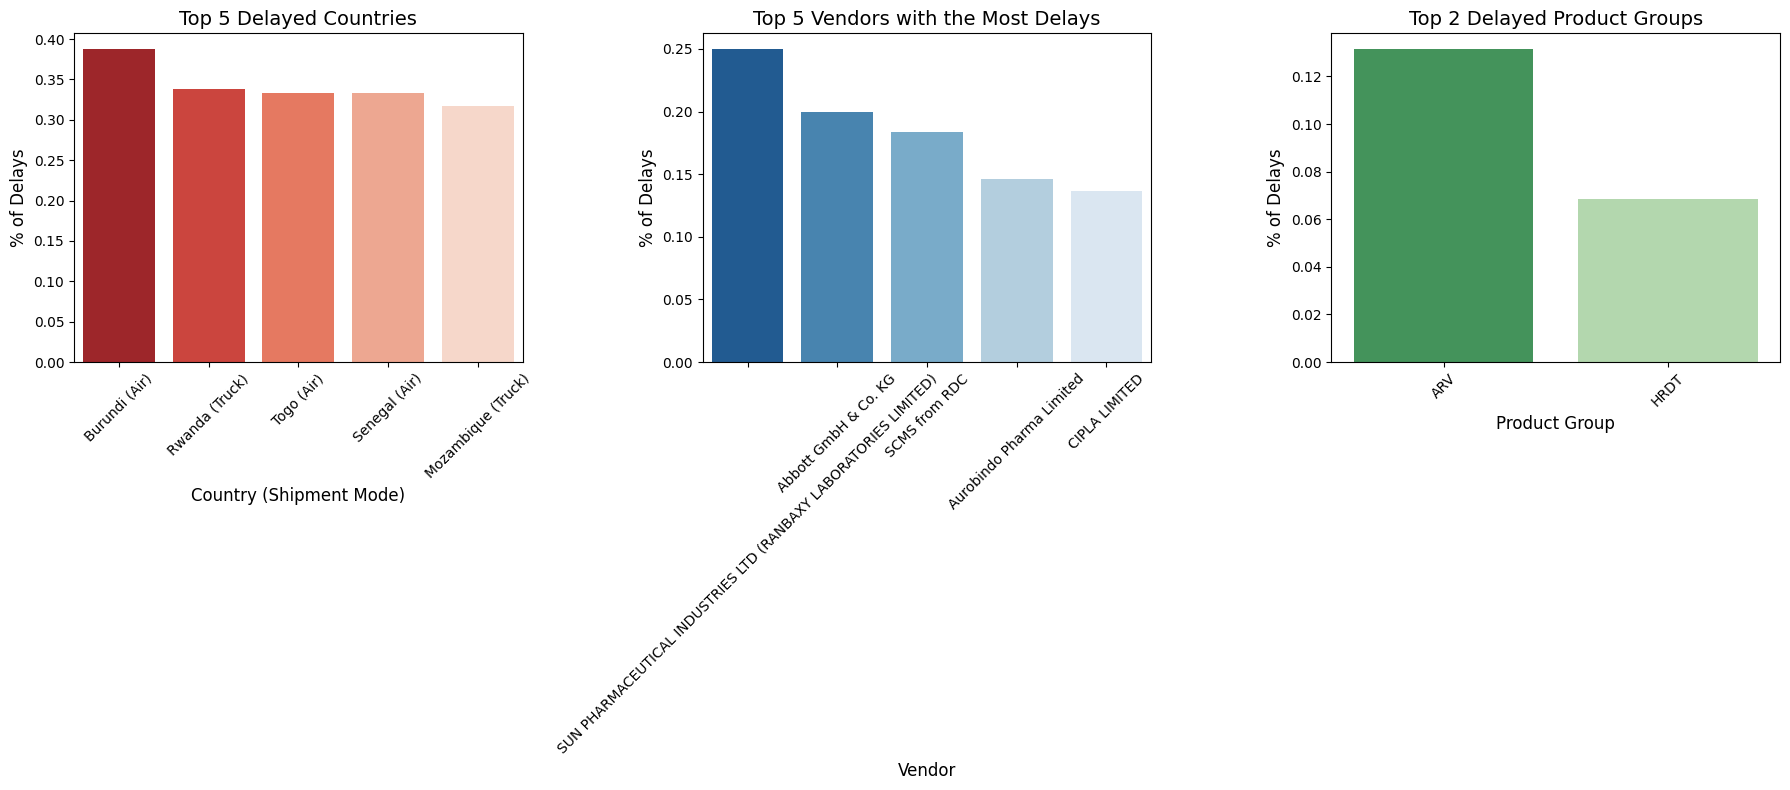

In [ ]:
# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1,3 , figsize=(18, 8))

# Now reset the index
top_delayed_countries = top_delayed_countries.reset_index()

x_values = top_delayed_countries['Country'] + ' (' + top_delayed_countries['Shipment Mode'] + ')'

sns.barplot(x=x_values, y=top_delayed_countries['Delayed'], palette="Reds_r", ax=axes[0])
axes[0].set_title("Top 5 Delayed Countries", fontsize=14)
axes[0].set_xlabel("Country (Shipment Mode)", fontsize=12)
axes[0].set_ylabel("% of Delays", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# --- Second Plot: Top 5 Delayed Vendors ---
top_delayed_vendors = arrival_status_by_vendor['Delayed'].sort_values(ascending=False).head(5)

sns.barplot(x=top_delayed_vendors.index, y=top_delayed_vendors.values, palette="Blues_r", ax=axes[1])
axes[1].set_title("Top 5 Vendors with the Most Delays", fontsize=14)
axes[1].set_xlabel("Vendor", fontsize=12)
axes[1].set_ylabel("% of Delays", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# --- Third Plot: Top 2 Delayed Product Groups (PG) ---
top_delayed_pg = arrival_status_by_pg['Delayed'].sort_values(ascending=False).head(2)

sns.barplot(x=top_delayed_pg.index, y=top_delayed_pg.values, palette="Greens_r", ax=axes[2])
axes[2].set_title("Top 2 Delayed Product Groups", fontsize=14)
axes[2].set_xlabel("Product Group", fontsize=12)
axes[2].set_ylabel("% of Delays", fontsize=12)
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plots
plt.show()

**Chart -2** *Cost vs Performance*

Shipping Cost vs Delivery Time:

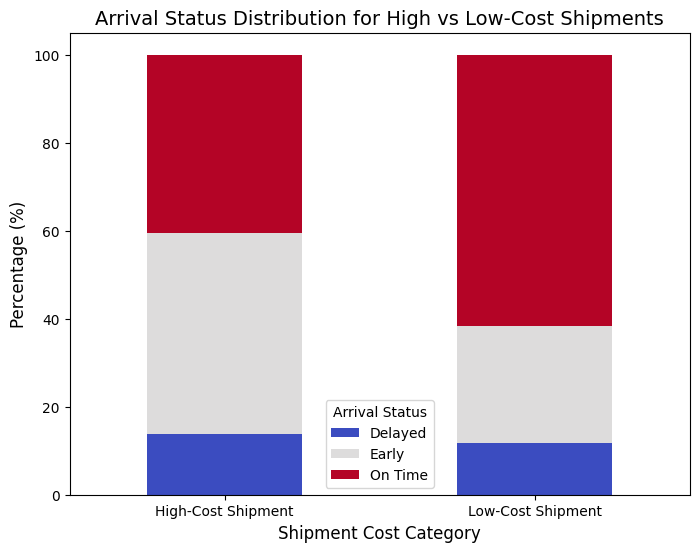

In [ ]:
arrival_status_df = pd.DataFrame({
    "High-Cost Shipment": high_cost_arrival_status,
    "Low-Cost Shipment": low_cost_arrival_status
})

# Transpose for better visualization
arrival_status_df = arrival_status_df.T

# Plot the stacked bar chart
arrival_status_df.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(8, 6))

# Add labels and title
plt.title("Arrival Status Distribution for High vs Low-Cost Shipments", fontsize=14)
plt.xlabel("Shipment Cost Category", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.legend(title="Arrival Status")

# Rotate x-axis labels for readability
plt.xticks(rotation=0)

# Show the plot
plt.show()

Insurance vs Delivery Time

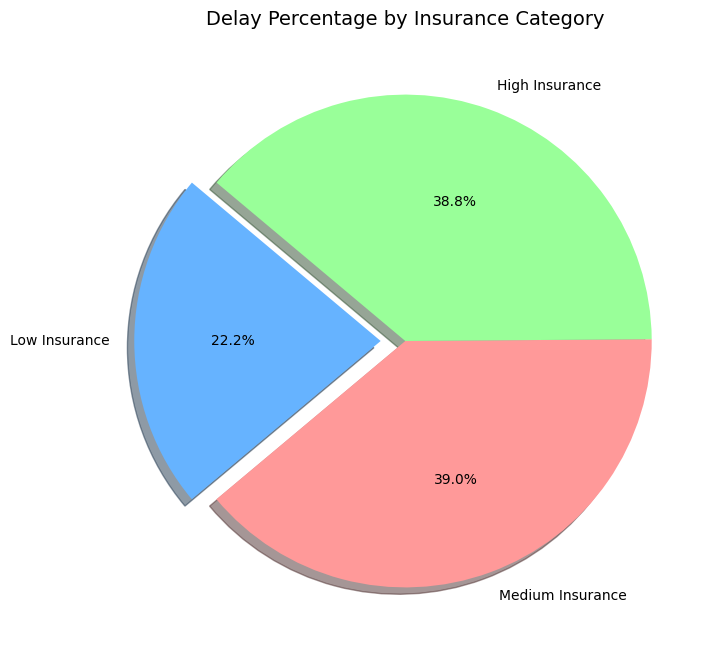

In [ ]:
# Data for the pie chart
labels = ["Low Insurance", "Medium Insurance", "High Insurance"]
sizes = [9, 15.81, 15.71]  # Delay percentages
colors = ["#66b3ff", "#ff9999", "#99ff99"]  # Custom colors for better visibility
explode = (0.1, 0, 0)  # Explode the first slice (Low Insurance) for emphasis

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, explode=explode, startangle=140, shadow=True)

# Title
plt.title("Delay Percentage by Insurance Category", fontsize=14)

# Show the chart
plt.show()


**Chart -3** *Vendor and Product Group*

Top 5 delayed vendors

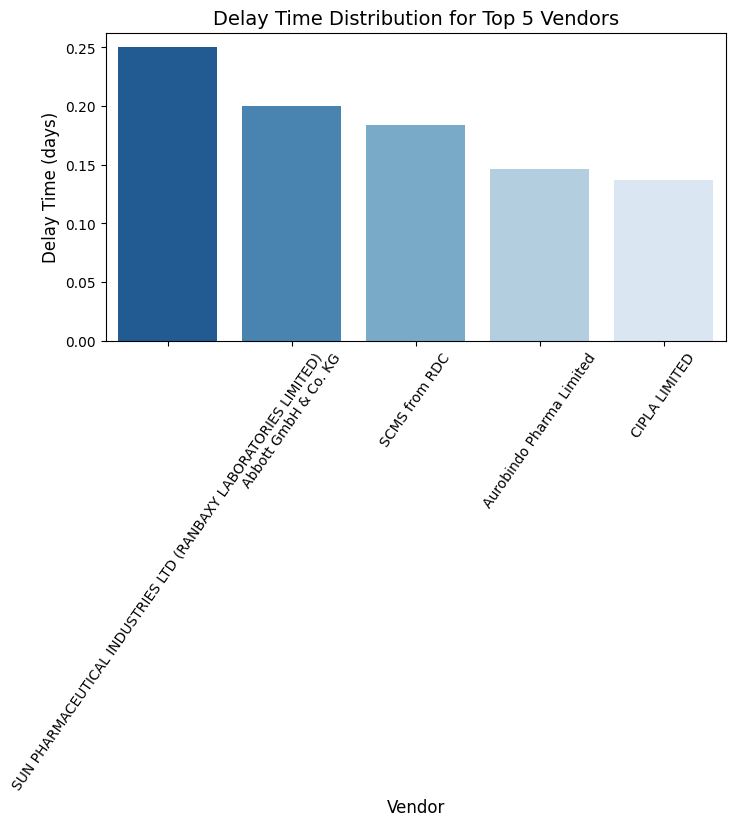

In [ ]:
plt.figure(figsize=(8, 4))

sns.barplot(x="Vendor", y="Delayed", data=vendor_timings, order=top_delayed_vendors.index, palette="Blues_r")

plt.title("Delay Time Distribution for Top 5 Vendors", fontsize=14)
plt.xlabel("Vendor", fontsize=12)
plt.ylabel("Delay Time (days)", fontsize=12)

plt.xticks(rotation=55)
plt.show()

**Chart -4** *Customer Satisfaction Indicators*

On-Time Delivery Rate

In [ ]:
# Create a dictionary with the values
delivery_rates = {
    "On Time": (data['Arrival Status'] == 'On Time').mean() * 100,
    "Early": (data['Arrival Status'] == 'Early').mean() * 100
}

# Convert to DataFrame
df_rates = pd.DataFrame(list(delivery_rates.items()), columns=['Status', 'Percentage'])

fig = px.pie(df_rates, values='Percentage', names='Status',
             title="On-Time vs Early Delivery Rate",
             color_discrete_sequence=px.colors.qualitative.Pastel,
             hole=0.4)  # Creates a donut chart

fig.show()


Repeat Vendor Effectiveness

In [ ]:
# Convert DataFrame to long format for Plotly
performance_long = performance_comparison.reset_index().melt(id_vars='Vendor', var_name='Arrival Status', value_name='Change')

# Create heatmap
fig = px.imshow(performance_comparison.T,
                labels=dict(x="Vendor", y="Arrival Status", color="Change in Performance"),
                x=performance_comparison.index,
                y=performance_comparison.columns,
                color_continuous_scale="RdYlGn")

fig.update_layout(title="Vendor Performance Comparison Over Time",
                  xaxis_title="Vendor",
                  yaxis_title="Arrival Status",
                  coloraxis_colorbar_title="Change")

fig.show()

**Chart -5** *Seasonality Trends*

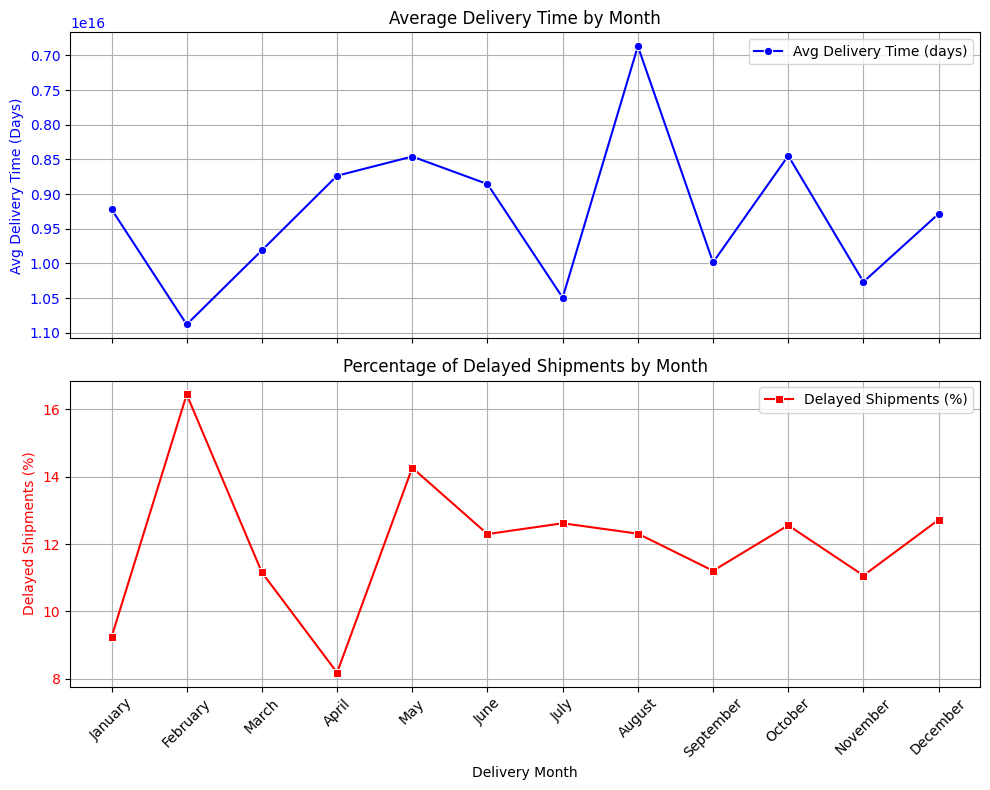

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# First subplot for Avg Delivery Time
sns.lineplot(
    x=monthly_trends.index,
    y=monthly_trends['avg_delivery_time'],
    marker='o', label="Avg Delivery Time (days)", color="blue", ax=axes[0]
)
axes[0].set_ylabel("Avg Delivery Time (Days)", color="blue")
axes[0].tick_params(axis='y', labelcolor="blue")
axes[0].grid(True)
axes[0].set_title("Average Delivery Time by Month")

# Second subplot for Delayed Shipments
sns.lineplot(
    x=monthly_trends.index,
    y=monthly_trends['delayed_shipments'],
    marker='s', label="Delayed Shipments (%)", color="red", ax=axes[1]
)
axes[1].set_ylabel("Delayed Shipments (%)", color="red")
axes[1].tick_params(axis='y', labelcolor="red")
axes[1].grid(True)
axes[1].set_title("Percentage of Delayed Shipments by Month")

# Set x-axis labels
axes[1].set_xlabel("Delivery Month")
plt.xticks(rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Cost Fluctuations

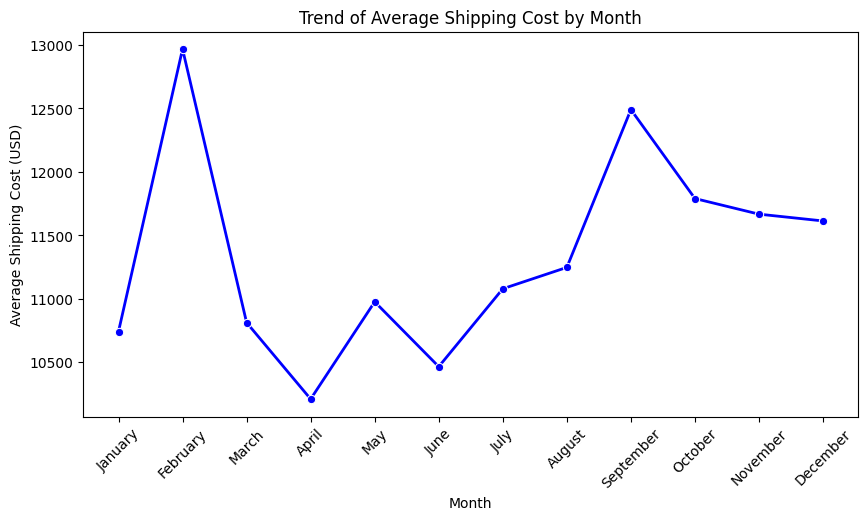

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_costs.index, y=monthly_costs.values, marker="o", linewidth=2, color="b")

# Labels and title
plt.xlabel("Month")
plt.ylabel("Average Shipping Cost (USD)")
plt.title("Trend of Average Shipping Cost by Month")
plt.xticks(rotation=45)

plt.show()

# **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**Optimizing FedEx Logistics' Supply Chain Operations**

* Improve air logistics in Burundi (38.78% delays) by streamlining customs and increasing flight frequency.

* Enhance truck logistics in Rwanda (33.80% delays) with alternative routes and real-time tracking.

* Optimize air shipment scheduling and customs clearance in Togo and Senegal.

* Improve road infrastructure and traffic management in Mozambique.

* Investigate SUN PHARMACEUTICAL INDUSTRIES LTD (25% delays) and Abbott GmbH & Co. KG (20% delays) for inefficiencies.

* Implement best practices from ACOUNS NIGERIA LTD and ACTION MEDEOR E.V. (11-day lead times).

* Reduce Pakistan (292-day), Guatemala (214-day), and Afghanistan (164-day) order durations.

* Optimize ocean shipments (176 days) with better container utilization.

* Speed up air shipments (111 days) with cargo space planning.

* Optimize high-cost shipments (45.74% early, 13.71% delayed) through better scheduling.

* Improve low-cost shipments (61.68% on-time) with enhanced planning.

* Expedite lightweight orders and negotiate bulk shipping rates for heavyweight orders.

* Avoid peak freight cost months (Feb, Sep, Oct) and leverage cheaper months (Apr, June).

* Strengthen vendor partnerships with Aurobindo Pharma and CIPLA LIMITED.

* Conduct performance audits for HETERO LABS LIMITED and SCMS from RDC.

* Investigate declining performance in SUN PHARMACEUTICAL INDUSTRIES LTD.

* Replicate August (79-day) delivery efficiency to other months.

* Introduce mitigation strategies for high-delay months (Feb, May).

* Implement AI-driven forecasting and IoT tracking.

* Use machine learning for optimized route planning.

* Establish strong SLAs with logistics partners.

* Enhance collaboration with reliable carriers and vendors.

* Stay competitive with proactive communication and feedback collection.




# Conclusion

* Air and truck shipments are primary contributors to delays, requiring process improvements.

* Certain vendors exhibit chronic delays and need performance reviews.

* Freight costs vary seasonally, with peak months increasing expenses significantly.

* High-cost shipments are more reliable, while low-cost shipments achieve better on-time performance.

* Vendor selection and logistics planning greatly impact efficiency and cost-effectiveness.

* AI, IoT, and machine learning can optimize route planning and shipment scheduling.

* Customer retention strategies, such as proactive communication and periodic offers, are essential to maintaining loyalty.

